<img src = 'https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true' width="240" height="360">

# EDA on Fastfood Data



## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
  - 3.1 [Description of the Datasets](#section301)<br>
  - 3.2 [Pandas Profiling before Data Preprocessing](#section302)<br>
4. [Data Preprocessing](#section4)<br>
  - 4.1 [Data Preprocessing](#section401)<br>
  - 4.2 [Pandas Profiling after Data Preprocessing](#section402)<br>
5. [Exploratory Data Analysis](#section5)<br>
  - 5.1 [**Analysis based on count**](#section501)<br>
    - 5.1.1 [Top 10 fast food restaurant?](#section50101)<br>
    - 5.1.2 [Top 10 fast food province?](#section501021)<br>
    - 5.1.2 [Bottom 5 fast food province?](#section501022)<br>
    - 5.1.3 [Top 10 fast food city?](#section50103)<br>
    - 5.1.4 [Geo graphical presentation of Restaurants across the US country](#section50104)<br>
  - 5.2 [**Analysis for top2 restaurant MCD and burger King**](#section502)<br>
      - 5.2.1 [Top 5 mcd_province ](#section50201)<br>
      - 5.2.2 [Top 5 Burger King_province ](#section50202)<br>
      - 5.2.3 [Analysis of % distribution of MCD in top 5 province](#section50203)<br>
      - 5.2.4 [Analysis of % distribution of Burger king in top 5 province?](#section50204)<br>
  - 5.3 [**MCD and Burger King Analysis Based on Top  province CA and FL**](#section503)<br>    
    - 5.3.1 [ comparison MCD and Burger-king position in TX province](#section50301)<br>
    - 5.3.2 [ comparison MCD and Burger-king position in FL province](#section50302)<br>
  - 5.4 [**Geo graphical position of mcdonald and Burger King in US**](#section504)<br>
    - 5.4.1 [Geo graphical position of mcdonald in US](#section50401)<br>
    - 5.4.2 [Geo graphical position of Burger King in US](#section50402)<br>
    - 5.4.3 [McDonald count in different province of US](#section50403)<br>
    - 5.4.4 [Burger King count in different province of US](#section50404)<br>
    - 5.4.5 [Count comparision of MacDonald and Burger King count in different province in US](#section50405)<br>
  
6. [Conclusion](#section6)
  - 6.1 [Actionable Insights](#section601)

<a id=section1></a>
## 1. Problem Statement

Attraction towards **Fast-food** is increased all over the world specially in US. and It creates large demand of fast-food restaurant. Here, we will analysis the different fast-food restaurant and their popularity in US.



<a id=section2></a>
## 2. Importing Packages

In [2]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

#import descartes
import geopandas as gpd
from shapely.geometry import point, polygon

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [4]:
# Install and update plotly using this command to the latest version (higher than version 4.0.0)

!pip install plotly --upgrade

Requirement already up-to-date: plotly in /opt/anaconda3/lib/python3.7/site-packages (4.5.4)


In [5]:
# Install chart_studio, please use this command. 

!pip install chart-studio

In [6]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

<a id=section3></a>
## 3. Loading Data

In this **Data Visualization** sheet we are using one datasets about **Fastfood in US**. 


### Importing  Dataset

In [7]:
# Importing the 1st dataset (Nutrition Facts for McDonald's Menu dataset).

df_fast = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/FastFoodRestaurants.csv')
df_fast.head(5)
df_fast.to_csv('/Users/kapil.gupta/Desktop/file.csv')

<a id=section301></a>
### Description of the Dataset

- This dataset provides a **data analysis** of different fast food restaurant in US with different province areas. 




| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| Address                       | Address of restaurant.                                                   | 
| City                           | Name of the City.                                                                          | 
| country                     | Name of the country.                                                        | 
| key                        | combination of street, province ).                                                     |
| latitude                        | latitude value.                                                                   |
| longitude                      | longitude value.                                                                 |
| name                  | name of restaurant.                                                             |
| postalCode                      | postalcode of restaurant.                                                                 |
| province                     | province of restaurant.                                                               |
| websites                  | websites of restaurant .                                                             |



In [8]:
df_fast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
address       10000 non-null object
city          10000 non-null object
country       10000 non-null object
keys          10000 non-null object
latitude      10000 non-null float64
longitude     10000 non-null float64
name          10000 non-null object
postalCode    10000 non-null object
province      10000 non-null object
websites      9535 non-null object
dtypes: float64(2), object(8)
memory usage: 781.4+ KB


- ```info``` function gives us the following insights into the df_fast dataframe:

  - There are a total of **10000 samples (rows)** and **10 columns** in the dataframe.
  
  - There are **8 columns** with a **object** datatype and **2 columns** with an **float64** datatype.
  
  - There are **465 missing** values in the data.

<a id=section302></a>
### 3.2 Pandas Profiling before Data Preprocessing

- Here, we will perform **Pandas Profiling before preprocessing** our dataset, so we will name the **output file** as __fast_food_profiling_before_preprocessing.html__. 


- The file will be stored in the directory of your notebook. Open it using the jupyter notebook file explorer and take a look at it and see what insights you can develop from it. 


- Or you can **output the profiling report** in the **current jupyter notebook** as well as shown in the code below. 

In [9]:
# To install pandas profiling please run this command.

!pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in /opt/anaconda3/lib/python3.7/site-packages (2.5.0)


In [10]:
import pandas_profiling 

In [11]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html

profile = df_fast.profile_report(title='fast_food_Pandas Profiling before Data Preprocessing')
profile.to_file(output_file="fast_food_profiling_before_preprocessing.html")


# To output the pandas profiling report on the notebook.

#df_merge.profile_report(title='Pandas Profiling before Data Preprocessing', style={'full_width':True})
df_fast.profile_report(title='Pandas Profiling before Data Preprocessing', html={'style':{'full_width':True}})

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 10
- Number of observations: 10000
- Missing cells: 465 (0.5%)


__Variables types__: 
- Numeric = 0
- Categorical = 7
- Real number = 2
- Rejected = 1 is US

<br>

- **country** has **constant value "US"** **Rejected**.


- **websites** has **465 (4.6%) missing values**.


- **postal code** is ** is object type as it have "-"** with **it should be int**.




- **City,name, address, postal code, website, province, keys ** has a **high cardinality **.


<a id=section4></a>
## 4. Data Preprocessing

<a id=section401></a>
### 4.1 Data Preprocessing

- Here we will perform **Data Preprocessing** on our dataset, to make the data usable for **EDA**.



In [12]:
df_fast.head()

address                    city country  \
0  324 Main St            Massena                 US       
1  530 Clinton Ave        Washington Court House  US       
2  408 Market Square Dr   Maysville               US       
3  6098 State Highway 37  Massena                 US       
4  139 Columbus Rd        Athens                  US       

                                                  keys  latitude  longitude  \
0  us/ny/massena/324mainst/-1161002137                  44.92130 -74.89021    
1  us/oh/washingtoncourthouse/530clintonave/-791445730  39.53255 -83.44526    
2  us/ky/maysville/408marketsquaredr/1051460804         38.62736 -83.79141    
3  us/ny/massena/6098statehighway37/-1161002137         44.95008 -74.84553    
4  us/oh/athens/139columbusrd/990890980                 39.35155 -82.09728    

               name postalCode province  \
0  McDonald's        13662      NY        
1  Wendy's           43160      OH        
2  Frisch's Big Boy  41056      KY        
3  McDonald's        13662      NY        
4  OMG! Rotisserie   45701      OH        

                                                                         websites  
0  http://mcdonalds.com,http://www.mcdonalds.com/?cid=RF:YXT_FM:TP::Yext:Referral  
1  http://www.wendys.com                                                           
2  http://www.frischs.com,https://www.frischs.com/location/maysville-ky/           
3  http://mcdonalds.com,http://www.mcdonalds.com/?cid=RF:YXT_FM:TP::Yext:Referral  
4  http://www.omgrotisserie.com,http://omgrotisserie.com

*********Data Cleaning**************
- Since the column **country** has a **constant value is "US"** for all the samples, we will drop this column.


- Also the columns **keys,websites, address and postalCode** will be **dropped** because they **don't provide** any additional **insights** into the data.

In [13]:
df_fast.drop(['country', 'keys','websites', 'address', 'postalCode'], 1, inplace=True)

In [16]:
df_fast.head(10)

city  latitude  longitude              name province
0  massena                 44.92130 -74.89021   mcdonald's        NY     
1  washington court house  39.53255 -83.44526   wendy's           OH     
2  maysville               38.62736 -83.79141   frisch's big boy  KY     
3  massena                 44.95008 -74.84553   mcdonald's        NY     
4  athens                  39.35155 -82.09728   omg! rotisserie   OH     
5  hamilton                39.41760 -84.47641   domino's pizza    OH     
6  englewood               39.86969 -84.29358   domino's pizza    OH     
7  saluda                  34.00598 -81.77040   mcdonald's        SC     
8  batesburg               33.91335 -81.53330   wendy's           SC     
9  paragould               36.06107 -90.52325   pizza hut         AR

Doing Lower case all the values from 'name' and city to make the data consistent

In [17]:
df_fast['name'] = df_fast['name'].str.lower()
df_fast['city'] = df_fast['city'].str.lower()
df_fast.head()

city  latitude  longitude              name province
0  massena                 44.92130 -74.89021   mcdonald's        NY     
1  washington court house  39.53255 -83.44526   wendy's           OH     
2  maysville               38.62736 -83.79141   frisch's big boy  KY     
3  massena                 44.95008 -74.84553   mcdonald's        NY     
4  athens                  39.35155 -82.09728   omg! rotisserie   OH

#https://www.kaggle.com/naveenste92/fast-food-eda


In [18]:
# clearing, filtering and removing errores from the fast-food data
#df_fast['name'].unique()[::5]
#df_fast.name.value_counts()[:10]
#df_fast.name=df_fast.name.str.replace("'", '').str.replace('!', '').str.replace('.', '').str.replace('-', ' ').str.replace('/', '').str.replace('®','').str.replace(' #25557','').str.replace('eleven','11').str.replace('mcdonalds','mcdonald')
df_fast.name=df_fast.name.str.split(r"[\'\/\-\.\(\#\@]", expand=True)[0].str.replace('mcdonalds','mcdonald').str.replace('mcdonald ','mcdonald').str.replace('mc donald','mcdonald').str.replace('mcdonald’s','mcdonald')
df_fast.name.value_counts()[:10]
#df_fast['name'].unique()

mcdonald          2119
burger king       1154
taco bell         874 
wendy             731 
arby              519 
kfc               443 
subway            404 
domino            345 
sonic drive in    248 
hardee            212 
Name: name, dtype: int64

In [19]:
df_fast['province'].unique()[::10] # every 10th value 
#df_fast.city.value_counts()[:40]

array(['NY', 'LA', 'MO', 'AZ', 'RI', 'DC'], dtype=object)

In [20]:
df_fast['city'].unique()

array(['massena', 'washington court house', 'maysville', ..., 'chatham',
       'miles city', 'east chicago'], dtype=object)

---

<a id=section402></a>
### 4.2 Pandas Profiling after Data Preprocessing

- Here, we will perform **Pandas Profiling after preprocessing** our dataset, so we will name the **output file** as __profiling_after_preprocessing.html__.

In [159]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_after_preprocessing.html

profile = df_fast.profile_report(title='Pandas fast_food Profiling after Data Preprocessing')
profile.to_file(output_file="fast_food profiling_after_preprocessing.html")


# To output the pandas profiling report on the notebook.
df_fast.profile_report(title='fast_food Pandas Profiling after Data Preprocessing', html={'style':{'full_width':True}})
#df_fast.profile_report(title='fast_food Pandas Profiling after Data Preprocessing', style={'full_width':True}

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 5
- Number of observations: 10000
- Missing cells: 0 (0.0%)


__Variables types__: 
- Numeric = 0
- Categorical = 3
- real = 2


---

In [160]:
df_fast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
city         10000 non-null object
latitude     10000 non-null float64
longitude    10000 non-null float64
name         10000 non-null object
province     10000 non-null object
dtypes: float64(2), object(3)
memory usage: 390.8+ KB


In [161]:
df_fast.head()

city  latitude  longitude             name province
0  massena                 44.92130 -74.89021   mcdonald         NY     
1  washington court house  39.53255 -83.44526   wendy            OH     
2  maysville               38.62736 -83.79141   frisch           KY     
3  massena                 44.95008 -74.84553   mcdonald         NY     
4  athens                  39.35155 -82.09728   omg! rotisserie  OH

<a id=section5></a>
## 5. Exploratory Data Analysis

- The **primary goal of EDA** is to **maximize the analyst's insight into a data set** and into the **underlying structure of a data set**, while **providing all of the specific items** that an **analyst would want to extract from a data set**


<a id=section501></a>
## 5.1 Analysis Based on  count

<a id=section50101></a>
### 5.1.1 Top 10 fast food restaurant?

Text(0.5, 1.0, 'Top 10 fast food restaurant')

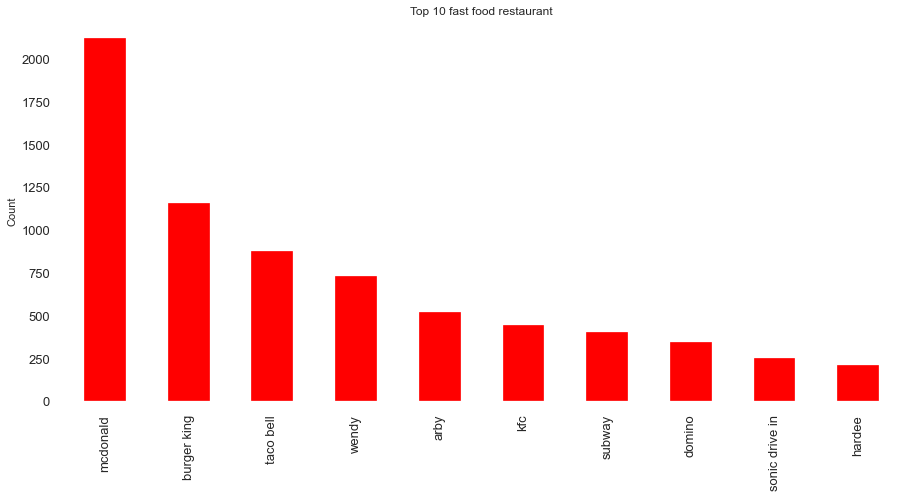

In [37]:
#restplt=df_fast.name.value_counts()[:10].plot.bar(title='Top 10 fast food restaurant') 
#restplt.set_xlabel('city',size=15) 
#restplt.set_ylabel('count',size=15)
nameplt=df_fast['name'].value_counts()[:10].plot(kind='bar', figsize=(15,7), fontsize=13, color='red')
plt.ylabel('Count')
plt.title('Top 10 fast food restaurant')

- This data represent ** mcdonald and burger king are the most popular fast food brand in US.


<a id=section501021></a>
### 5.1.2.1 Top 10 fast food province

Text(0.5, 1.0, 'Top 10 fast food Province')

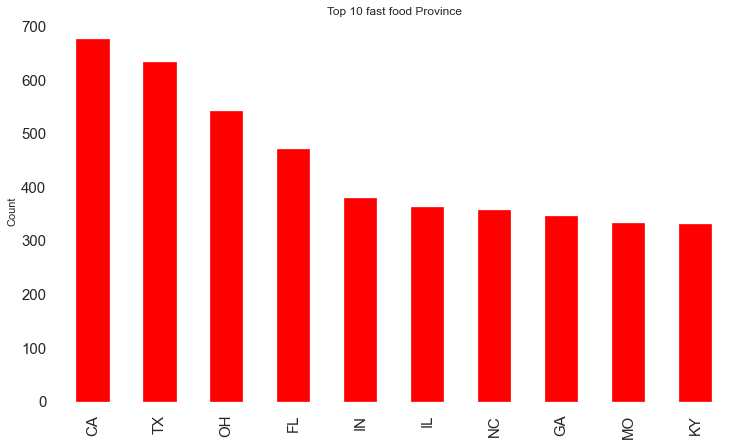

In [38]:
#provinceplt=df_fast.province.value_counts()[:10].plot.bar(title='Top 10 province') provinceplt.set_xlabel('province',size=15) 
#provinceplt.set_ylabel('count',size=15)
provinceplt=df_fast['province'].value_counts()[:10].plot(kind='bar', figsize=(12,7), fontsize=15, color='red')
plt.ylabel('Count')
plt.title('Top 10 fast food Province')

<a id=section501022></a>
### 5.1.2.2 Bottom 5 fast food province

Text(0.5, 1.0, 'Bottom 5 province in US')

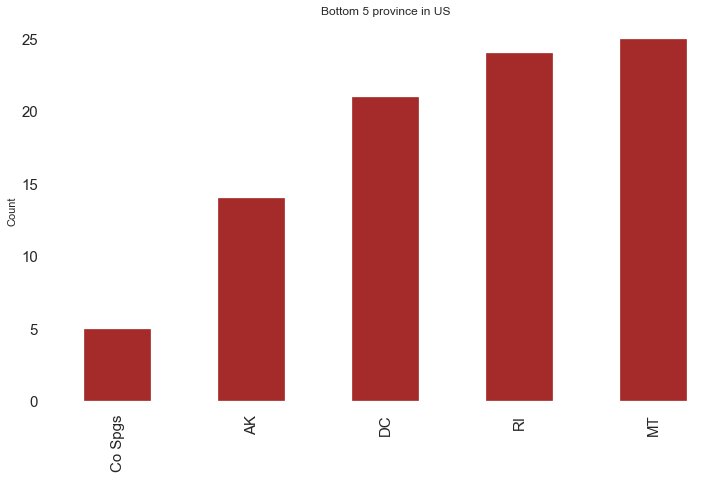

In [36]:
provinceplt=df_fast['province'].value_counts()[-1:-6:-1].plot(kind='bar', figsize=(12,7), fontsize=15, color='brown')
plt.ylabel('Count')
plt.title('Bottom 5 province in US')


- CA and TX province are top 2 in restaurant counts in **US**.


<a id=section50103></a>
### 5.1.3 Top 10 fast food city

Text(0.5, 1.0, 'Top 10 fast food city in US')

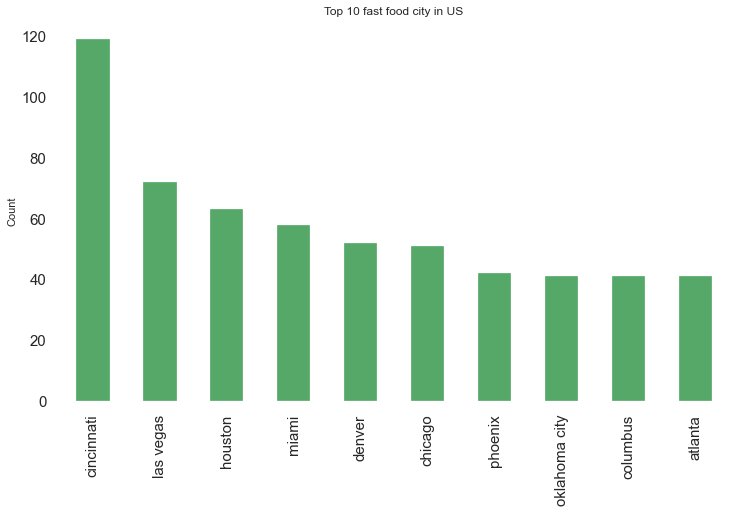

In [39]:
cityplt=df_fast['city'].value_counts()[:10].plot(kind='bar', figsize=(12,7), fontsize=15, color='g')
plt.ylabel('Count')
plt.title('Top 10 fast food city in US')

<a id=section50104></a>
### 5.1.4 Geo graphical presentation of Restaurants across the US country

Text(0.5, 1.0, 'geo grahical restarunt data in US')

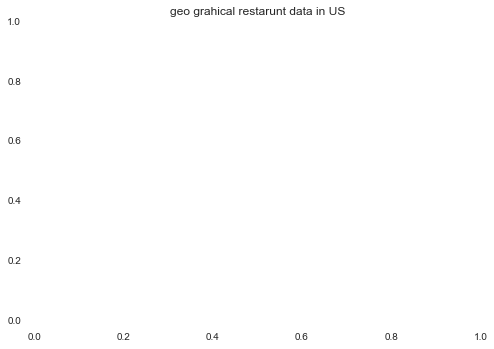

In [40]:
#!pip install geopandas
import descartes
import geopandas as gpd
from  shapely.geometry import Point, Polygon 
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=True)
import plotly.graph_objs as go
df_fast['text'] = df_fast['name'] + ',' + df_fast['province']


scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_fast['longitude'],
        lat = df_fast['latitude'],
        text = df_fast['text'],
        mode = 'markers',
        marker = dict(
            size = 4,
            opacity = 0.5,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=.5,
                color='rgba(102, 102, 102)'
            )))]
layout = dict(
        title = 'Restaurants across the country',
        colorbar = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )
iplot( fig, validate=False, filename='all restaurants' )



<a id=section502></a>
## 5.2 Analysis for top2 restaurant MCD and burger King 

<a id=section50201></a>
### 5.2.1 Top 5 mcd_province 

Text(17.200000000000003, 0.5, 'count')

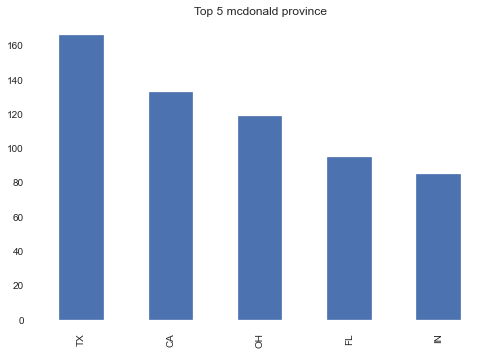

In [48]:
mcd=df_fast[df_fast.name =='mcdonald']
mcd_province = mcd.province
#mcd_lat = mcd.latitude
#mcd_lon = mcd.longitude
mcdprovince=mcd_province.value_counts()[:5].plot.bar(title='Top 5 mcdonald province') 
provinceplt.set_xlabel('province',size=20) 
provinceplt.set_ylabel('count',size=20)


- Top 2 province for MCD are TX and CA.

<a id=section50202></a>
### 5.2.2 Top 5 province for burger kings 

Text(17.200000000000003, 0.5, 'count')

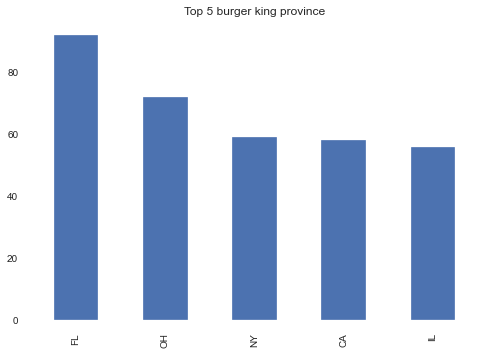

In [47]:
bgking=df_fast[df_fast.name =='burger king']
#bgking_lat = bgking.latitude
#bgking_lon = bgking.longitude
bgking_province = bgking.province
bgkingprovince=bgking_province.value_counts()[:5].plot.bar(title='Top 5 burger king province') 
provinceplt.set_xlabel('province',size=20) 
provinceplt.set_ylabel('count',size=20)

- **Top 2 Burger king province are in US are FL and OH.




<a id=section50203></a>
### 5.2.3 Analysis of % distribution of MCD in top 5 province

Text(0.5, 1.0, 'Donut Plot showing the mcdonald proportion  for top 5 province ')

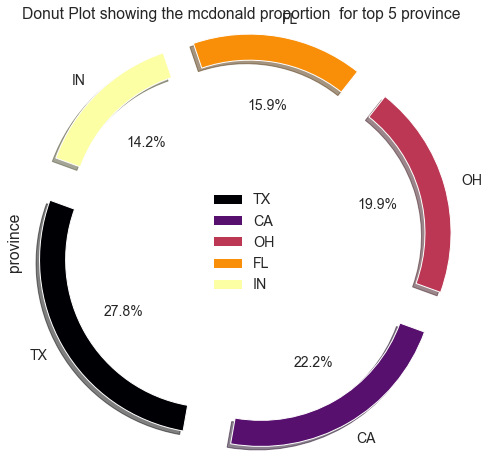

In [167]:
space = np.ones(5)/5
mcd['province'].value_counts()[:5].plot(kind='pie', explode=space, fontsize=14, autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       shadow=True, startangle=160, figsize=(8,8), cmap='inferno', legend=True)

plt.ylabel('province')
plt.title('Donut Plot showing the mcdonald proportion  for top 5 province ')

MCD is 27.8% in TX and 22.2% in CA and almost 20% in OH

<a id=section50204></a>
### 5.2.4 Analysis of % distribution of Burger king in top 5 province??

Text(0.5, 1.0, 'Donut Plot showing the Burger king proportion    for top 5 province ')

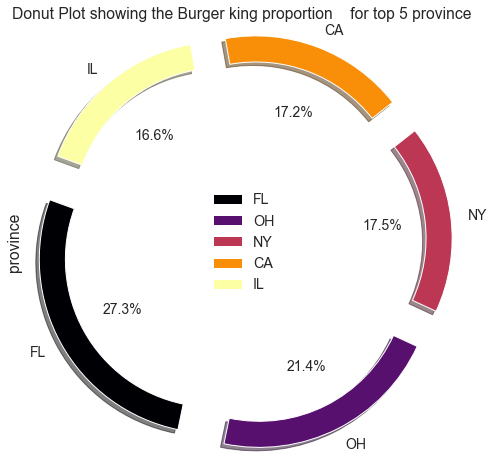

In [168]:
space = np.ones(5)/5
bgking['province'].value_counts()[:5].plot(kind='pie', explode=space, fontsize=14, autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       shadow=True, startangle=160, figsize=(8,8), cmap='inferno', legend=True)

plt.ylabel('province')
plt.title('Donut Plot showing the Burger king proportion for top 5 province ')

- Burger king is more famous in FL by 27.3, OH 21.4%, Ny 17.5% and CA 17.2%

<a id=section503></a>
## 5.3 MCD and Burger King Analysis Based on Top  province CA and FL

<a id=section50301></a>
### 5.3.1 comparison MCD and Burger-king position  in TX province?

Text(0.5, 1.0, 'Donut Plot showing the top 5 restaurant proportion in TX province ')

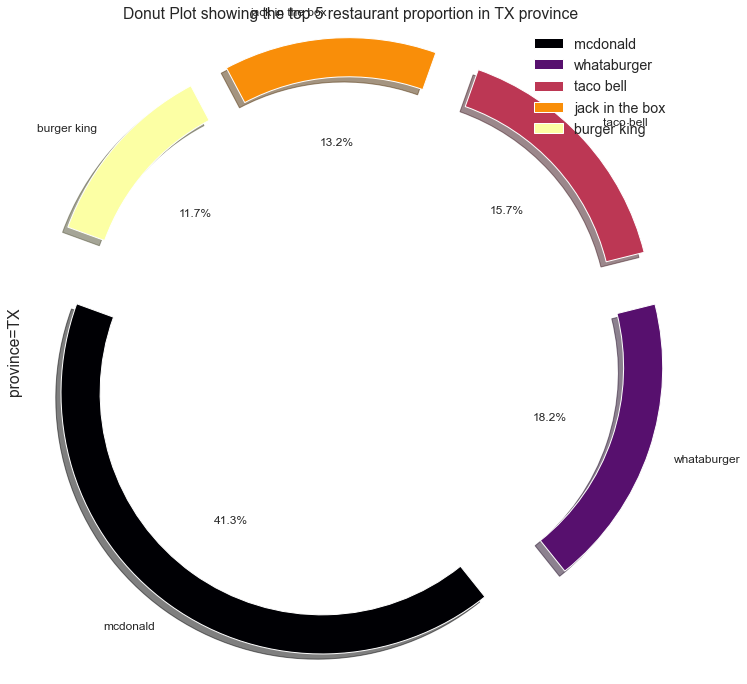

In [169]:
TX=df_fast[df_fast.province =='TX']
#CA=df_fast[df_fast.province =='CA']
space = np.ones(5)/5
TX['name'].value_counts()[:5].plot(kind='pie', explode=space, fontsize=12, autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       shadow=True, startangle=160, figsize=(12,12), cmap='inferno', legend=True)

plt.ylabel('province=TX')
plt.title('Donut Plot showing the top 5 restaurant proportion in TX province ')


- **MCdonald is first postion in TX with 41.3% and  Burger king is 5th position in TX with 11.7

<a id=section50302></a>
### 5.3.2 comparison MCD and Burger-king position in FL province?

Text(0.5, 1.0, 'Donut Plot showing the top 5 restaurant proportion in FL province ')

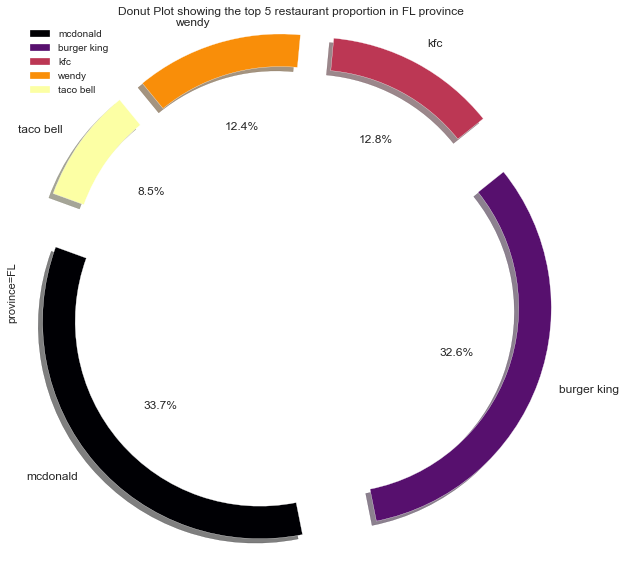

In [49]:
FL=df_fast[df_fast.province =='FL']
#CA=df_fast[df_fast.province =='CA']
space = np.ones(5)/5
FL['name'].value_counts()[:5].plot(kind='pie', explode=space, fontsize=12, autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       shadow=True, startangle=160, figsize=(10,10), cmap='inferno', legend=True)

plt.ylabel('province=FL')
plt.title('Donut Plot showing the top 5 restaurant proportion in FL province ')

- - **MCdonald and Burger king both have approx postion in FL 

<a id=section504></a>
## 5.4 Geo graphical position of mcdonald and Burger King in US

<a id=section50401></a>
### 5.4.1 Geo graphical position of mcdonald in US

In [171]:
mapbox_access_token='pk.eyJ1IjoibmF2ZWVuOTIiLCJhIjoiY2pqbWlybTc2MTlmdjNwcGJ2NGt1dDFoOSJ9.z5Jt4XxKvu5voCJZBAenjQ'

In [175]:
mcd=df_fast[df_fast.name =='mcdonald']
mcd_lat = mcd.latitude
mcd_lon = mcd.longitude
mcd_city = mcd.city

data = [
    go.Scattermapbox(
        lat=mcd_lat,
        lon=mcd_lon,
        mode='markers',
        marker=dict(
            size=5,
            opacity=0.3
        ))]
layout = go.Layout(
    title='Mcdonalds Restaurants',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=38,
            lon=-94
        ),
        pitch=0,
        zoom=3,
        style='light'
    ),
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='Mcdonalds restaurant')

<a id=section50402></a>
### 5.4.2 Geo graphical position of Burger King in US

In [173]:
bgking=df_fast[df_fast.name =='burger king']
bgking_lat = bgking.latitude
bgking_lon = bgking.longitude
bgking_city = bgking.city

data = [
    go.Scattermapbox(
        lat=bgking_lat,
        lon=bgking_lon,
        mode='markers',
        marker=dict(
            size=5,
            opacity=0.3
        ))]
layout = go.Layout(
    title='burger king Restaurants',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=38,
            lon=-94
        ),
        pitch=0,
        zoom=3,
        style='light'
    ),
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='burger kingt')



<a id=section50403></a>
### 5.4.3 McDonald count in different province in US

Text(0.5, 1.0, 'mcdonald count in different province in US')

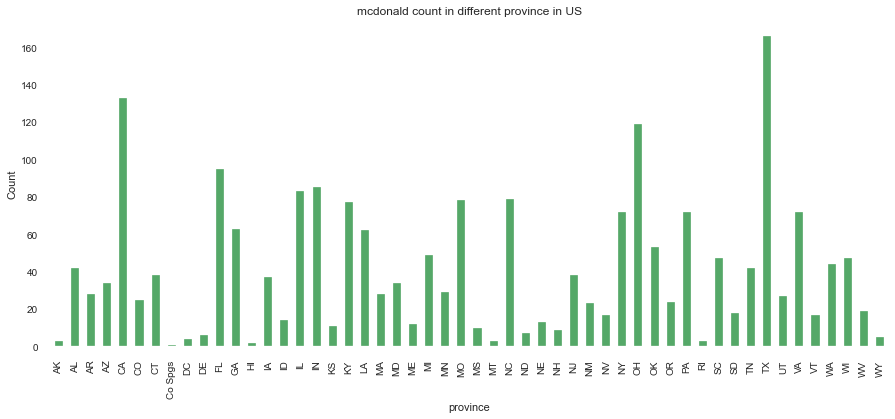

In [24]:
#provinceplt=df_fast['province'].value_counts()[:10]
mcd=df_fast[df_fast.name =='mcdonald']
#burgerking=df_fast[df_fast.name =='burger king']
plt.figure(figsize = (15, 6))
mcd.groupby('province')['name'].count().plot(kind='bar', color='g')
plt.ylabel('Count')
plt.title('mcdonald count in different province in US')

<a id=section50404></a>
### 5.4.4 Burger King count in different province in US

Text(0.5, 1.0, 'Burger King count in different province in US')

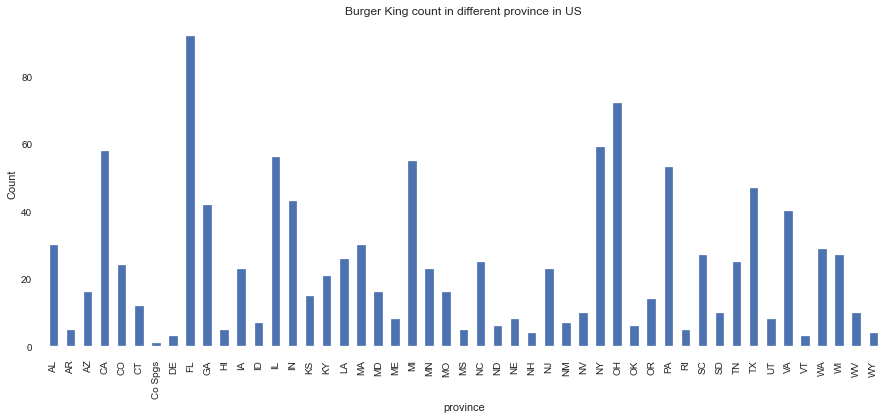

In [25]:
#mcd=df_fast[df_fast.name =='mcdonald']
burgerking=df_fast[df_fast.name =='burger king']
plt.figure(figsize = (15, 6))
burgerking.groupby('province')['name'].count().plot(kind='bar', color='b')
plt.ylabel('Count')
plt.title('Burger King count in different province in US')

<a id=section50405></a>
### 5.4.5 Count comparision of MacDonald and  Burger King count in different province in US

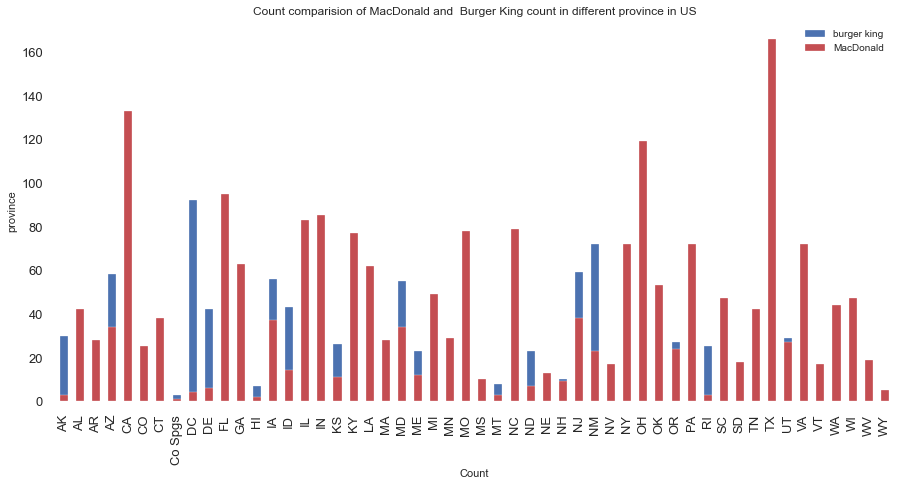

In [28]:
burgerking.groupby('province')['name'].count().plot(kind='bar', figsize=(15, 7), color='b')
mcd.groupby('province')['name'].count().plot(kind='bar', figsize=(15, 7), color='r', fontsize=13)


plt.xlabel('Count')
plt.ylabel('province')
plt.title('Count comparision of MacDonald and  Burger King count in different province in US')
plt.legend(labels=('burger king', 'MacDonald'))

<a id=section6></a>
## 6. Conclusion

- US is full of fast food restaurant and Burgers are most liked fast food in US.

- Mcdonald and Burger king are 2 most popular fast food brands in US and popularity of burger is more than other fast food in US.
 

<a id=section601></a>
### 6.1 Actionable Insights

- Two Burger brands are top most in count. means Burger are more famous than other fastfood items in US

- As per our analysis we found  McDonald is number one fast food chain in US. However, Burger king going to give good competition in some province like FL.


- City Cincinnati have maximum fast food restaurant in US.

- Province TX and CA have maximum restaurant in US

-   in TX province, Mcdonald is one number one and Burger king is at number 5 position 
-   in FL Burger king and MacDonald have approx same density

- CO spg(Colorado Springs) and AK are Bottom 2 Province in fast food restaurant

- McDonald have higer density of restaurant TX, CA and OH Province

- BurgerKing have higer density of restaurant FL, OH and NY Province

